Kyle Polansky (KPP446), Brian White (BCW824)

# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Tuesday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ridge and Lasso Regression (15 points)
Use the following codes to import the diabetes dataset.

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

The dataset consists of ten features and one target variable.  More information is found at http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

After importing the datasets, use the following code to add additional second-order polynomial and interaction variables to the features matrix.  You should have 65 variables and one target variable. Note that this code adds all combinations of the features with degree less than or equal to two; in practice one may introduce only a few based on domain knowledge or experimentation.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

###### 1.)

Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

In [6]:
import numpy as np
alphas = 10**np.linspace(10,-2,100)*0.5

Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (5pts)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

(5000000000.0, 0.0050000000000000001)

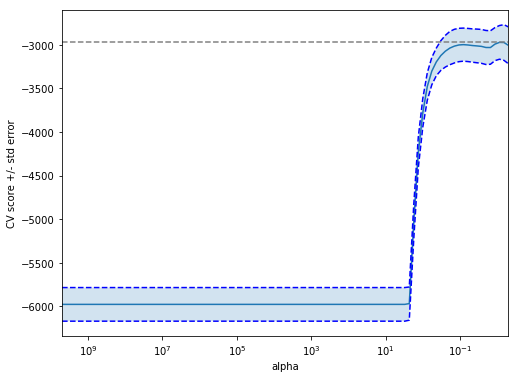

In [8]:
lasso = Lasso(random_state=0)
clfLasso = GridSearchCV(lasso, [{'alpha': alphas}], cv=n_folds, refit=False, scoring='neg_mean_squared_error')
clfLasso.fit(X_train, y_train)

lasso_scores = clfLasso.cv_results_['mean_test_score']
lasso_scores_std = clfLasso.cv_results_['std_test_score']

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, lasso_scores)

# plot error lines showing +/- std. errors of the scores
lasso_std_error = lasso_scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, lasso_scores + lasso_std_error, 'b--')
plt.semilogx(alphas, lasso_scores - lasso_std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, lasso_scores + lasso_std_error, lasso_scores - lasso_std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(lasso_scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [9]:
clfLasso.best_params_

{'alpha': 0.008737642000038414}

In [10]:
clfLasso.best_index_

97

(5000000000.0, 0.0050000000000000001)

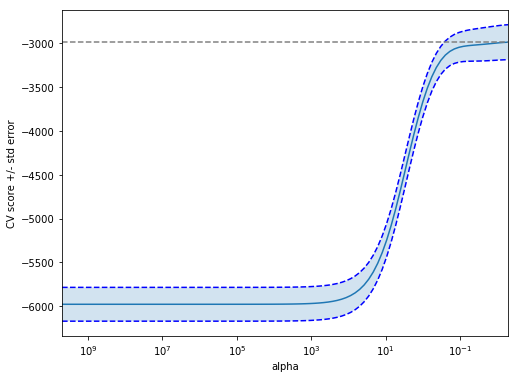

In [11]:
ridge = Ridge(random_state=0)
clfRidge = GridSearchCV(ridge, [{'alpha': alphas}], cv=n_folds, refit=False, scoring='neg_mean_squared_error')
clfRidge.fit(X_train, y_train)

ridge_scores = clfRidge.cv_results_['mean_test_score']
ridge_scores_std = clfRidge.cv_results_['std_test_score']

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, ridge_scores)

# plot error lines showing +/- std. errors of the scores
ridge_std_error = ridge_scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, ridge_scores + ridge_std_error, 'b--')
plt.semilogx(alphas, ridge_scores - ridge_std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, ridge_scores + ridge_std_error, ridge_scores - ridge_std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(ridge_scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [12]:
clfRidge.best_params_

{'alpha': 0.0050000000000000001}

In [13]:
clfRidge.best_index_

99

###### 2.)

Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (4pts)

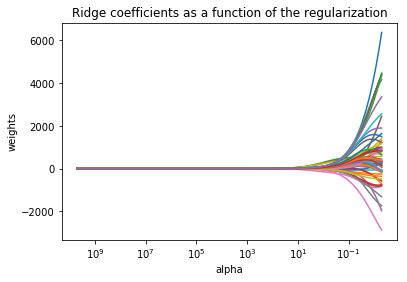

In [14]:
ridge_coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)
    
axr = plt.gca()
axr.plot(alphas, ridge_coefs)
axr.set_xscale('log')
axr.set_xlim(axr.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

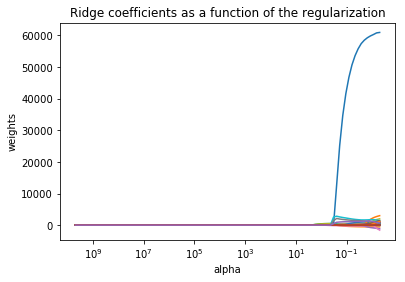

In [15]:
lasso_coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)
    
axl = plt.gca()
axl.plot(alphas, lasso_coefs)
axl.set_xscale('log')
axl.set_xlim(axl.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

###### 3.)

Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (3pts)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mean_squared_error(y_test, y_pred_lr)

3501.5167251313151

In [18]:
las = Lasso(alpha=alphas[clfLasso.best_index_])
las.fit(X_train, y_train)
y_pred_las = las.predict(X_test)
mean_squared_error(y_test, y_pred_las)

2961.4375901194871

In [19]:
rr = Ridge(alpha=alphas[clfRidge.best_index_])
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
mean_squared_error(y_test, y_pred_rr)

2946.7947707212161

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

In [20]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 65 variables. What do you observe from these coefficients? (3pts)

In [21]:
lcv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [22]:
y_pred_lcv = lcv.predict(X_test)
mean_squared_error(y_test, y_pred_lcv)

2971.8100656194392

In [23]:
lcv.coef_.tolist()

[-6.410335048336849,
 -197.57695949445562,
 546.9846375027084,
 348.23882293640133,
 -920.2011471672945,
 726.9138371059967,
 31.984625972452264,
 -14.809549285690974,
 817.1583421631225,
 5.9408698057314036,
 0.0,
 2527.811727446281,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 1554.8514187339465,
 -0.0,
 -0.0,
 0.0,
 496.50450943072946,
 0.0,
 0.0,
 0.0,
 -1188.6116899224955,
 0.0,
 0.0,
 664.1644372544711,
 724.0950659288067,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 875.4500751189478,
 151.45850921085074,
 66.5938469199982,
 0.0,
 374.6476199692065,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 546.6806586719351,
 0.0,
 369.9835468185662,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 875.268858330013,
 -0.0,
 0.0,
 54.676437801117025]

There are many coefficients that are 0, becauase Lasso Regression uses L1 regularization

# Question 2  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer

Using interaction terms abstracts the model more from the data and makes it more difficult to manually analyse the terms. For example, an interaction term of "User's last 4 of credit card number times last 3 letters in day of the week encoded as ascii" may fit really well, but it would perhaps be obvious that there is no correlation if the variables were fitted independantly with a linear model.

Additionally, there are a large number of interaction terms. For a dataset with 100 distinct terms, there are to the order of 10^30 different permutations that could be chosen, making this a much more computationally intensive task.

# Question 3 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

Using the formulas for K-nearest neighbor, Bias = $f(x)-\frac{1}{k}\sum\limits_{i=1}^k f(x_i)$ and Variance = $\frac{\sigma_\epsilon^2}{k}$, we can see that for an increase in K, the bias increase and the variance will decrease. Likewise, for a decrease in K, the bias will decrease and the variance will increase.

# Question 4: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

###### a.)

(4 points) Generate box-plots of the "rent" (% of farmers that rent all their land) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers.

In [24]:
import pandas as pd
df = pd.read_csv('russett_full_v2.csv')
df.head()

,country,gini,farm,rent,gnpr,labo,inst,ecks,death,demo_class,demo_score
0,Argentina,86.3,98.2,47.9,374,25,16.6,47.0,217,2,35
1,Australia,92.9,99.6,30.0,1215,14,19.3,0.0,0,1,89
2,Austria,74.0,97.4,25.7,532,32,15.8,4.0,0,2,52
3,Belgium,58.7,85.8,98.3,1015,10,23.5,8.0,1,1,98
4,Bolivia,93.8,97.7,35.0,66,72,18.3,43.0,663,3,19


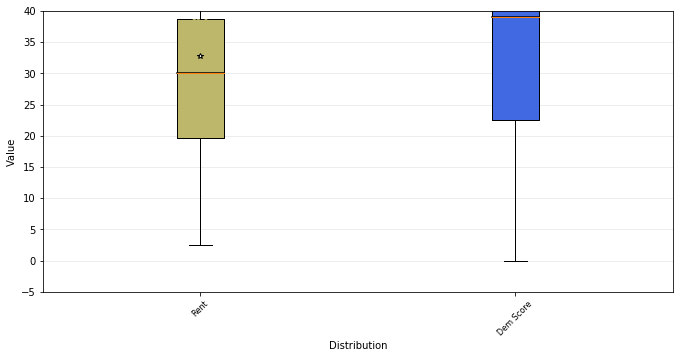

In [25]:
data = [df['rent'], df['demo_score']]

from matplotlib.patches import Polygon

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = 2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=['Rent', 'Dem Score'])
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='x-small', weight=weights[k],
             color=boxColors[k])

plt.show()

###### b.)

(3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks'.

In [30]:
from sklearn.model_selection import train_test_split
X = np.asarray([df['rent'], df['inst'], df['ecks']]).T
X.shape

(47, 3)

In [31]:
y = df['demo_score'][:, np.newaxis]
y.shape

(47, 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=10)

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

In [45]:
from math import sqrt

lin = LinearRegression()
lin.fit(X_train, y_train)
lin_train_preds = lin.predict(X_train)
lin_test_preds = lin.predict(X_test)
print("X_train:", sqrt(mean_squared_error(y_train, lin_train_preds)))
print("X_test:", sqrt(mean_squared_error(y_test, lin_test_preds)))

X_train: 25.559001844999955
X_test: 33.50125180607724


###### c.)

(4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

In [51]:
from sklearn.linear_model import HuberRegressor

hub = HuberRegressor(alpha=0.0)
hub.fit(X_train, y_train)
hub_train_preds = hub.predict(X_train)
hub_test_preds = hub.predict(X_test)
print("X_train:", sqrt(mean_squared_error(y_train, hub_train_preds)))
print("X_test:", sqrt(mean_squared_error(y_test, hub_test_preds)))

X_train: 26.43390552291075
X_test: 30.95435264032695


/Users/connorwhite/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###### d)

(4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general?

# Question 5 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

1) Using the function $n=p(1-p)(z_{\alpha/2}/\epsilon)^2$, with values $z_{\alpha/2} = z_.05 = 1.645$ and $\epsilon = .03$, we can use the simplified equation: $n=p(1-p)(1.645/.03)^2 = p(1-p)(3006.69)$

1.i) Plugging in p: $n = .5(1-.5)(3006.69) = 752 $

1.ii) Plugging in p: $n = .25(1-.25)(3006.69) = 564 $


2.i) By using a z-table, we can see that $z_.01 = 2.33$ and $z_.005 = 2.58$. Since $n \propto z^2$, we get that reducing $\alpha$ to .01, the number of samples would increase to 1226.

2.ii) By using a z-table, we can see that $z_.01 = 2.33$ and $z_.025 = 1.96$. $n \propto (\frac{z}{\epsilon})^2$, so number of samples would increase to 2632.


# Question 6 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [55]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

###### a.)

Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

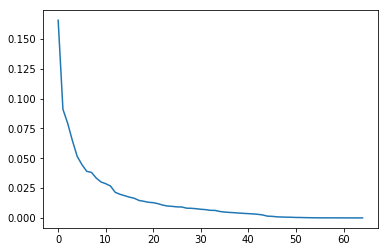

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=65)
pca.fit(X)

plt.plot(pca.explained_variance_ratio_)

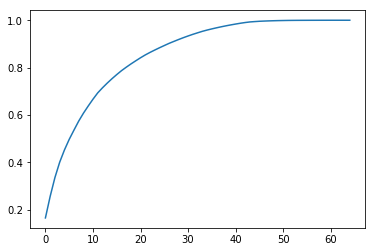

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

###### b.)

How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

In [71]:
found = 0
counter = 0
for n in np.cumsum(pca.explained_variance_ratio_):
    counter+=1
    if n > 0.3 and found == 0:
        print("30% explained by", counter, "principal components")
        found = 1
    elif n > 0.6 and found == 1:
        print("60% explained by", counter, "principal components")
        found = 2
    elif n> 0.9 and found == 2:
        print("90% explained by", counter, "principal components")
        found = 3

30% explained by 3 principal components
60% explained by 9 principal components
90% explained by 27 principal components


###### c.)

Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively.  (This is called Principal Components Regression). Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

In [81]:
pca1 = PCA(3)
X1 = pca1.fit_transform(X)

lin1 = LinearRegression()
lin1.fit(X1, y)
pred_1 = lin1.predict(X1)
mean_squared_error(y, pred_1) 

5120.6055477937216

In [82]:
pca2 = PCA(9)
X2 = pca2.fit_transform(X)

lin2 = LinearRegression()
lin2.fit(X2, y)
pred_2 = lin2.predict(X2)
mean_squared_error(y, pred_2) 

3942.7867514263498

In [ ]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin_train_preds = lin.predict(X_train)
lin_test_preds = lin.predict(X_test)
print("X_train:", sqrt(mean_squared_error(y_train, lin_train_preds)))
print("X_test:", sqrt(mean_squared_error(y_test, lin_test_preds)))